In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Iris Data Set, Version 1
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=None)
df = pd.DataFrame(iris)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114290d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114629358>]], dtype=object)

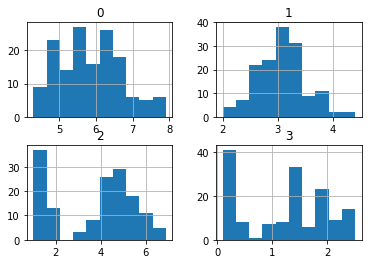

In [6]:
df.iloc[:, 0:4].hist()

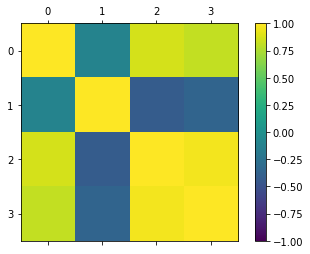

In [12]:
correlations = df.iloc[:, 0:4].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

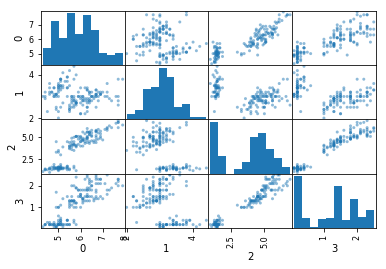

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:, 0:4])
plt.show()

In [107]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', max_iter=10000, alpha=1e-5)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('Loss: ', mlp.loss_)

[[16  0  0]
 [ 0 15  2]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.86      1.00      0.92        12

    avg / total       0.96      0.96      0.96        45

Loss:  0.00768911654112
